# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [88]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')


# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample


# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.metrics as metrics
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report

Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


The purposes of EDA before constructing a logistic regression model are

1) to identify data anomalies such as outliers and class imbalance that might affect the modeling;

2) to verify model assumptions such as no severe multicollinearity.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
data = data.dropna(axis=0)

In [10]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

In [12]:
def boxplot(col):
    sns.boxplot(data=data, x=col)
    plt.title(f"Boxplot of {col}")
    

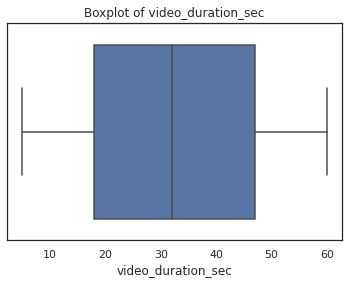

In [13]:
# Create a boxplot to visualize distribution of `video_duration_sec`
boxplot('video_duration_sec')

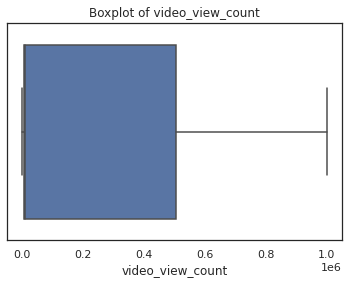

In [14]:
# Create a boxplot to visualize distribution of `video_view_count`
boxplot('video_view_count')

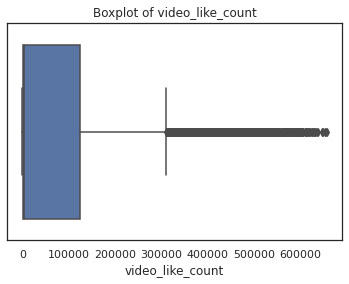

In [15]:
# Create a boxplot to visualize distribution of `video_like_count`
boxplot('video_like_count')

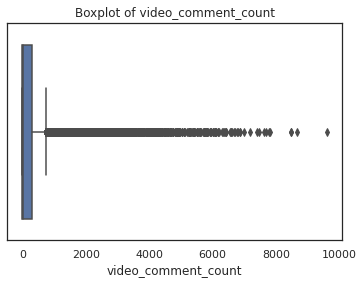

In [16]:
# Create a boxplot to visualize distribution of `video_comment_count`
boxplot('video_comment_count')

In [17]:
# Check for and handle outliers for video_like_count
data[['video_like_count', 'video_comment_count']].describe()

,video_like_count,video_comment_count
count,19084.000000,19084.000000
mean,84304.636030,349.312146
std,133420.546814,799.638865
min,0.000000,0.000000
25%,810.750000,1.000000
50%,3403.500000,9.000000
75%,125020.000000,292.000000
max,657830.000000,9599.000000


In [18]:
q1 = data["video_comment_count"].quantile(0.25)
q3 = data["video_comment_count"].quantile(0.75)

iqr = q3 - q1
upper = q3 + 1.5*iqr

data.loc[data['video_comment_count'] > upper, 'video_comment_count'] = upper

In [19]:
q1 = data["video_like_count"].quantile(0.25)
q3 = data["video_like_count"].quantile(0.75)

iqr = q3 - q1
upper = q3 + 1.5*iqr

data.loc[data['video_like_count'] > upper, 'video_like_count'] = upper

Check class balance.

In [20]:
# Check class balance for verified_status
data["verified_status"].value_counts(normalize=True).to_frame()

,verified_status
not verified,0.93712
verified,0.06288


Approximately 93.7% of the dataset represents videos posted by unverified accounts and 6.3% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [21]:
# Use resampling to create class balance in the outcome variable, if needed
from sklearn.utils import resample
# Identify data points from majority and minority classes
data_oversampled = data[data["verified_status"] == "not verified"]
data_undersampled = data[data["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_undersampled_upsampled = resample(data_undersampled, 
                                       replace=True, 
                                       n_samples=len(data_oversampled), 
                                       random_state=42)

# Combine majority class with upsampled minority class
data_balanced = pd.concat([data_oversampled, data_undersampled_upsampled]).reset_index(drop=True)

# Display new class counts
data_balanced["verified_status"].value_counts().to_frame()

,verified_status
not verified,17884
verified,17884


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [22]:
data_balanced['video_transcription_text']

0        someone shared with me that drone deliveries a...
1        someone shared with me that there are more mic...
2        someone shared with me that american industria...
3        someone shared with me that the metro of st. p...
4        someone shared with me that the number of busi...
                               ...                        
35763    i say that human eyeballs do not grow or chang...
35764    my colleagues' impression is that people are b...
35765    i understand that cactus spines can be used to...
35766    a friend learned  on an internet forum a claim...
35767    in my opinion badminton is the fastest ball an...
Name: video_transcription_text, Length: 35768, dtype: object

In [23]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_balanced['text_length'] = data_balanced['video_transcription_text'].str.len()

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [24]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data_balanced.groupby('verified_status')[['text_length']].mean().round(2)

,text_length
verified_status,
not verified,89.40
verified,84.56


In [25]:
# Display first few rows of dataframe after adding new column
data_balanced.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

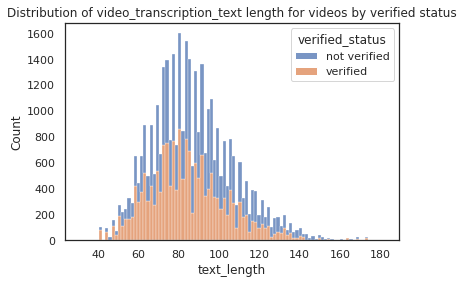

In [26]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data=data_balanced, x='text_length', hue='verified_status',  multiple='stack')
plt.title('Distribution of video_transcription_text length for videos by verified status');

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [27]:
# Code a correlation matrix to help determine most correlated variables
# Compute the correlation matrix
corr = data_balanced.drop(columns=['#', 'video_id']).corr()
corr

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
video_duration_sec,1.000000,0.013892,0.004028,0.001944,0.006930,-0.000080,-0.005043
video_view_count,0.013892,1.000000,0.855343,0.710466,0.691557,0.747564,0.246867
video_like_count,0.004028,0.855343,1.000000,0.832361,0.806369,0.816416,0.217852
video_share_count,0.001944,0.710466,0.832361,1.000000,0.709738,0.671601,0.176362
video_download_count,0.006930,0.691557,0.806369,0.709738,1.000000,0.794524,0.175287
video_comment_count,-0.000080,0.747564,0.816416,0.671601,0.794524,1.000000,0.217179
text_length,-0.005043,0.246867,0.217852,0.176362,0.175287,0.217179,1.000000


Visualize a correlation heatmap of the data.

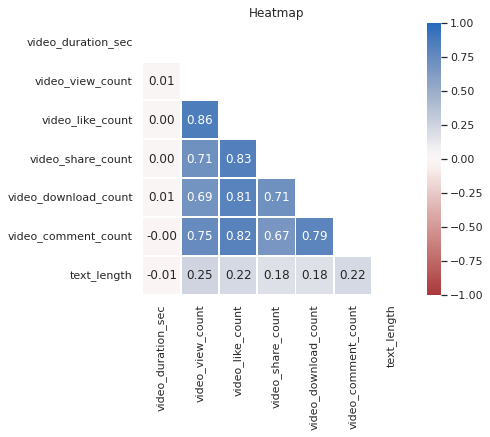

In [28]:
# Create a heatmap to visualize how correlated variables are
mask = np.triu(corr)
plt.figure(figsize=(6, 5))
sns.heatmap(corr, 
            vmin=-1, vmax=1, 
            cmap='vlag_r', 
            annot=True, fmt=".2f", 
            mask = mask, 
            linecolor='white', linewidth=1)
plt.title("Heatmap");

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

**Answer:**

Overall, the variables related to video metrics (`video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count`) are shown to be positively correlated with each other, suggesting that they may provide redundant information for the logistic regression model. 

One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, we should exclude these variables from the model.

The remaining variables, `video_duration_sec` and `text_length`, are not as strongly correlated with each other, so they may provide more unique information for the model. 

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [29]:
# Select outcome variable
y = data_balanced['verified_status']

Select the features.

In [30]:
# Select feature
X = data_balanced[['video_duration_sec', 'claim_status', 'author_ban_status', 'text_length']]


# Display first few rows of features dataframe
X.head()

,video_duration_sec,claim_status,author_ban_status,text_length
0,59,claim,under review,97
1,32,claim,active,107
2,31,claim,active,137
3,25,claim,active,131
4,19,claim,active,128


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Confirm that the dimensions of the training and testing sets are in alignment.

In [32]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28614, 4), (7154, 4), (28614,), (7154,))

### **Task 3c. Encode variables**

Check the data types of the features.

In [33]:
# Check data types
X.dtypes

video_duration_sec     int64
claim_status          object
author_ban_status     object
text_length            int64
dtype: object

In [34]:
# Get unique values in `claim_status`
X_train["claim_status"].unique()

array(['claim', 'opinion'], dtype=object)

In [35]:
# Get unique values in `author_ban_status`
X_train["author_ban_status"].unique()

array(['under review', 'active', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [54]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse=False)
X_encoder

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [37]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
X_train_to_encode.head()

,claim_status,author_ban_status
4351,claim,under review
18967,opinion,active
24897,opinion,active
5916,claim,active
10822,opinion,active


In [60]:
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [61]:
# Create column names for the one-hot encoded features
encoded_columns = encoder.get_feature_names(input_features=X_train_to_encode.columns)
encoded_columns

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [40]:
# Display first few rows of encoded training features
X_train_encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [41]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=encoded_columns)

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [42]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,text_length
4351,8,80
18967,17,70
24897,46,105
5916,22,110
10822,10,75


In [43]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,8,80,0.0,0.0,1.0
1,17,70,1.0,0.0,0.0
2,46,105,1.0,0.0,0.0
3,22,110,0.0,0.0,0.0
4,10,75,1.0,0.0,0.0


Check the data type of the outcome variable.

In [44]:
# Check data type of outcome variable
y_train.dtype

dtype('O')

In [45]:
# Get unique values of outcome variable
y_train.unique()

array(['not verified', 'verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [46]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse=False)

In [47]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()


# Display the encoded training outcome variable
y_train_final

array([0., 1., 1., ..., 0., 0., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [74]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression().fit(X_train_final, y_train_final)

In [75]:
log_clf.coef_

array([[-1.10888754e-03, -5.51047569e-04,  1.62613920e+00,
        -2.44557276e-01, -1.44993834e-01]])

In [76]:
log_clf.intercept_

array([-0.98418041])

In [73]:
y_train_encoded = y_train.replace({"verified": 1, "not verified": 0})


logit_model = smf.logit(formula='verified_status ~ video_duration_sec + claim_status + author_ban_status + text_length', 
                        data=pd.concat([X_train, y_train_encoded], axis=1))

logit_model_result = logit_model.fit()
logit_model_result.summary()

Optimization terminated successfully.
         Current function value: 0.621612
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        verified_status   No. Observations:                28614
Model:                          Logit   Df Residuals:                    28608
Method:                           MLE   Df Model:                            5
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.1032
Time:                        15:32:55   Log-Likelihood:                -17787.
converged:                       True   LL-Null:                       -19834.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.9859      0.073    -13.597      0.000      -1.128      -0.844
claim_status[T.opinion]               1.6275      0.030     53.988      0.000       1.568       1.687
author_ban_status[T.banned]          -0.2448      0.058     -4.244      0.000      -0.358      -0.132
author_ban_status[T.under review]    -0.1450      0.048     -3.030      0.002      -0.239      -0.051
video_duration_sec                   -0.0011      0.001     -1.406      0.160      -0.003       0.000
text_length                          -0.0005      0.001     -0.827      0.408      -0.002       0.001
=====================================================================================================
"""

**Note:**

Using `statsmodels` library, we receive the same result as using `sklearn` library. 

Looking at the P-value, we can see that p-value of  predictor variables `video_duration_sec` and `text_length` is larger than significant level of 0.05 so we cannot reject the null hypothesis for these predictor variables. In other words, there is no statistically significant evidence to suggest that these variables have a significant impact on the outcome variable `verified_status` in the logistic regression model.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [56]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[['claim_status','author_ban_status']]


# Display first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
26849,opinion,active
1227,claim,under review
25467,opinion,under review
27310,opinion,banned
27560,opinion,banned


In [62]:
# Fit and transform the training features using the encoder
X_tét_encoded = X_encoder.fit_transform(X_test_to_encode)

In [63]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [64]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names(input_features=X_test_to_encode.columns))

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0


In [65]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,text_length
26849,14,109
1227,43,111
25467,52,64
27310,17,61
27560,8,84


In [66]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,text_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,14,109,1.0,0.0,0.0
1,43,111,0.0,0.0,1.0
2,52,64,1.0,0.0,1.0
3,17,61,1.0,1.0,0.0
4,8,84,1.0,1.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [67]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [68]:
# Display the predictions on the encoded testing set
y_pred

array([1., 0., 1., ..., 1., 1., 1.])

Display the true labels of the testing set.

In [69]:
# Display the true labels of the testing set
y_test

26849        verified
1227     not verified
25467        verified
27310        verified
27560        verified
             ...     
26076        verified
3745     not verified
29982        verified
26151        verified
31083        verified
Name: verified_status, Length: 7154, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [70]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 0., 1., ..., 1., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [71]:
# Get shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((28614, 5), (28614,), (7154, 5), (7154,))

In [105]:
y_test_encoded = y_test.replace({"verified": 1, "not verified": 0})


logit_model = smf.logit(formula='verified_status ~ video_duration_sec + text_length + claim_status + author_ban_status', 
                        data=pd.concat([X_test, y_test_encoded], axis=1))

logit_model_result = logit_model.fit()
logit_model_result.summary()

Optimization terminated successfully.
         Current function value: 0.608237
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        verified_status   No. Observations:                 7154
Model:                          Logit   Df Residuals:                     7148
Method:                           MLE   Df Model:                            5
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.1225
Time:                        15:57:04   Log-Likelihood:                -4351.3
converged:                       True   LL-Null:                       -4958.6
Covariance Type:            nonrobust   LLR p-value:                2.168e-260
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.6668      0.146     -4.558      0.000      -0.954      -0.380
claim_status[T.opinion]               1.7093      0.060     28.306      0.000       1.591       1.828
author_ban_status[T.banned]          -0.4358      0.122     -3.571      0.000      -0.675      -0.197
author_ban_status[T.under review]    -0.2657      0.096     -2.763      0.006      -0.454      -0.077
video_duration_sec                   -0.0065      0.002     -4.028      0.000      -0.010      -0.003
text_length                          -0.0024      0.001     -1.773      0.076      -0.005       0.000
=====================================================================================================
"""

The model works better on the test dataset.

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

In [85]:
log_cm

array([[1918, 1631],
       [ 581, 3024]])

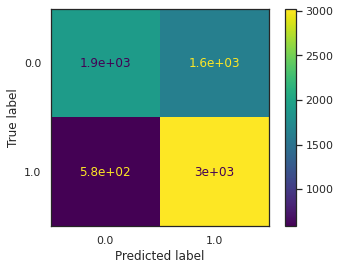

In [79]:
# Compute values for confusion matrix
log_cm = metrics.confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

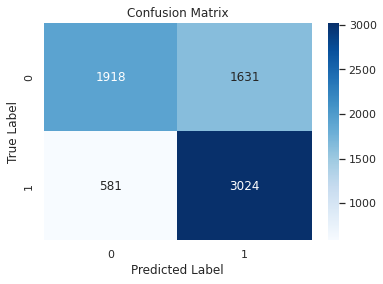

In [86]:
# Create a heatmap for the confusion matrix
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Note:**

- True Positives (TP): The number of videos posted by verified accounts that the model correctly classified as "verified." In this case, there are 3024 true positives.

- True Negatives (TN): The number of videos posted by unverified accounts that the model correctly classified as "not verified." In this case, there are 1918 true negatives.

- False Positives (FP): The number of videos posted by unverified accounts that the model incorrectly classified as "verified." In this case, there are 1631 false positives.

- False Negatives (FN): The number of videos posted by verified accounts that the model incorrectly classified as "not verified." In this case, there are 581 false negatives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [89]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.77      0.54      0.63      3549
not verified       0.65      0.84      0.73      3605

    accuracy                           0.69      7154
   macro avg       0.71      0.69      0.68      7154
weighted avg       0.71      0.69      0.68      7154



**Note:**

The model's overall accuracy is 69%, indicating reasonable performance. However, there is a trade-off between correctly identifying "verified" videos (recall of 54%) and minimizing misclassifications of "not verified" videos (precision of 65%). The model's F1-score for "verified" videos is 0.63, and for "not verified" videos, it is 0.73. Further fine-tuning may be necessary to improve specific aspects of the model's performance.

Overall, the logistic regression model seems to perform well. The model has a high accuracy and the precision, recall, and f1-score metrics are all fairly good. However, the model could be improved by increasing the precision for verified videos.

### **Task 4c. Interpret model coefficients**

In [110]:
col = X_train_final.columns

In [112]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
col = X_train_final.columns

pd.DataFrame(data={"Feature Name":col, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,-0.001109
1,text_length,-0.000551
2,claim_status_opinion,1.626139
3,author_ban_status_banned,-0.244557
4,author_ban_status_under review,-0.144994


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

Key Takeaways from the Project:

1. Data Preprocessing: Data preprocessing is a crucial step in any machine learning project. We handled missing values, performed feature engineering, and one-hot encoded categorical variables to prepare the data for modeling.

2. Exploratory Data Analysis (EDA): EDA helped us gain insights into the relationships between variables and identify correlations between them. Visualizations like scatter plots, heatmaps, and histograms provided valuable information about the data.

3. Model Selection and Evaluation: We used various machine learning models such as Linear Regression and Logistic Regression for regression and classification tasks, respectively. We evaluated the model performance using metrics like R-squared, mean absolute error, mean squared error, confusion matrix, precision, recall, and F1-score.

4. Feature Importance: We examined the coefficients of the logistic regression model to determine the impact of each feature on the outcome variable. This allowed us to identify the most significant factors contributing to the target variable.

Results Presented from this Project:

1. Regression Metrics: We presented metrics like R-squared, mean absolute error, mean squared error, and root mean squared error for the regression model. These metrics quantify how well the model predicts the fare amount based on the input features.

2. Classification Metrics: For the classification model, we presented metrics like accuracy, precision, recall, and F1-score. These metrics evaluate how well the model classifies videos as either verified or not verified based on features like video duration and text length.

3. Confusion Matrix: The confusion matrix provides a detailed breakdown of true positive, false positive, true negative, and false negative predictions. It helps assess the performance of the classification model and identify misclassifications.

4. Feature Importance: We displayed the coefficients of the logistic regression model to show which features (e.g., claim_status, author_ban_status) have the most significant impact on the likelihood of a video being verified.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 